##### $Name:\,\color{blue}{Bin\,Lu,\,Maymoonah\,Bashir,\,Christopher\,J.\,Watson}$
##### $School:\,\color{blue}{Marcos\,School\,of\,Engineering,\,University\,of\,San\,Diego}$
##### $Class:\,\color{blue}{AAI\,500-\,Probability\,\&\,Stats\,for\,AI}$
##### $Assignment:\,\color{blue}{MSAAI\,Final Project-Outliers}$
##### $Date:\,\color{blue}{10/22/2022}$

### Problem - Outlier Handling

Statement - The problem with massive outliers is that they can skew the data and make it harder to work with or understand. Many times we would want a model to be resistant against such outliers so training with them is encouraged. There are 2 main reasons we will remove some outliers for our project. 
$\newline$
1) The point of this model is to predict the price of a car. We wouldn't want to give someone a prediction that is well over value which could inflate the market or make it difficult to sell their vehicle. We also wouldn't want to tell them to give away their car for free, or just a dollar. Some cars can be cheap but generally transactions like that are prices of people giving the car to a family or friend.
$\newline$
2) When observing the data there was a car that was sold for 26 million. This is obviously a data error of some form. Maybe the van also contained quite a few gold bars. Reguardless of why, this is multiple powers of 10 outside of the normal range, and with this in mind we should remove outliers of this nature.

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import data_utils_g1 as du
plt.style.use('seaborn')

# Get Path
path = 'C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/sanitized_1_final.csv'

# Reading the dataset
data = pd.read_csv(path)
print("The shape of the dataframe is: ", data.shape)

The shape of the dataframe is:  (19237, 20)


In [6]:
# Understand the data
data.describe()

,Unnamed: 0,ID,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,19237.0000,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,9618.0000,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,5553.3879,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,0.0000,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4809.0000,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,9618.0000,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,14427.0000,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,19236.0000,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


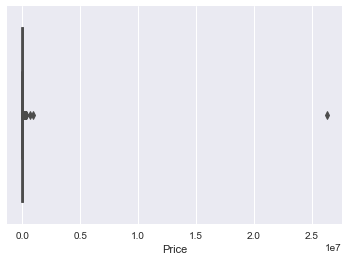

In [3]:
# This is a boxplot of the data, notice the massive outlier
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Price'])
plt.show()

As shown in the box plot above there is at least 1 super outlier that completely harms the data. Using a systematic attempt it was removed.

In [7]:
# Use data utils function for group 2
# This is the column to base the decision on 
decision_column = 'Price'
# Function Call to our utils library - see Appendix-2
Q3, Q1, filtered_data = du.remove_outliers2(data, decision_column)

# print nice answer
print(f'The lower data limit is ${Q1:.2f} and the upper data limit is ${Q3:.2f}')

# Understand the data
filtered_data.describe()

The lower data limit is $3.00 and the upper data limit is $345384.78


,Unnamed: 0,ID,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,19217.000000,1.921700e+04,19217.000000,19217.000000,19217.000000,19217.000000,1.921700e+04,19217.000000,19217.000000
mean,9618.009887,4.557636e+07,17128.202061,632.751782,2010.913670,2.308102,1.421973e+06,4.582453,6.583286
std,5553.556104,9.370593e+05,18279.641947,567.652166,5.666155,0.877367,4.588801e+07,1.198624,4.319785
min,0.000000,2.074688e+07,6.000000,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4808.000000,4.569837e+07,5331.000000,0.000000,2009.000000,1.800000,7.019400e+04,4.000000,4.000000
50%,9618.000000,4.577234e+07,13172.000000,642.000000,2012.000000,2.000000,1.260210e+05,4.000000,6.000000
75%,14426.000000,4.580204e+07,22110.000000,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,19236.000000,4.581665e+07,308906.000000,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


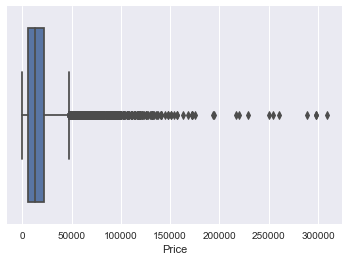

In [5]:
# This is a boxplot of the data, with outliers removed
plt.figure(figsize=(6,4))
sns.boxplot(x=filtered_data['Price'])
plt.show()

As we can see from the table and the box plot, although there are still outliers, the ones that massively skewed the data have been removed. In my opinion, more could have been removed from the bottom but we decided that it would be even on both the left and the right sides of the data. 
$\newline$
Upper percentile from base data = 0.99985
$\newline$
Lower percentile from base data = 0.00015
$\newline$

### In conclusion, this removal was required to make an accurate model for suggesting what a costumer should sell their car for in the market.